TASK-2:DECISION TREE CLASSIFIER(IRIS DATASET)

Classifying Iris flowers using Decision tree

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Load Data

In [57]:
data_set=pd.read_csv("Iris.csv")

data understanding

In [60]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [58]:
data_set.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [59]:
data_set.shape

(150, 6)

In [61]:
data_set.drop("Id",axis=1,inplace=True)

data_set.describe()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [62]:
data_set.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [63]:
data.columns.values

array(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
       'PetalWidthCm', 'Species'], dtype=object)

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [65]:
#Checking for missing values
miss_val = data_set.isna().sum()
miss_val

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Data Processing

In [66]:
data.drop('Id',axis=1,inplace = True)

#label encode
data=data.replace(to_replace={'Species':{'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}})
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [67]:
data['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

Visualization

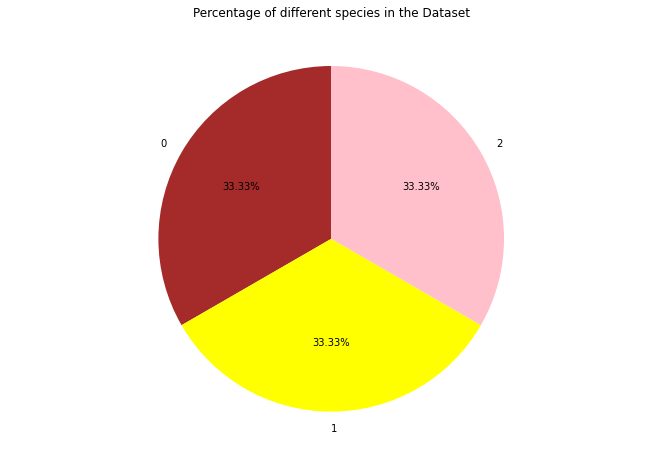

In [70]:
fig = plt.figure(figsize=(9, 6))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('equal')
colors = ['brown','yellow','pink']
sp = data['Species'].unique()
ct = data['Species'].value_counts().tolist()
ax.pie(ct, labels = sp, autopct='%1.2f%%', colors=colors, startangle=90)
plt.title('Percentage of different species in the Dataset')
plt.show()


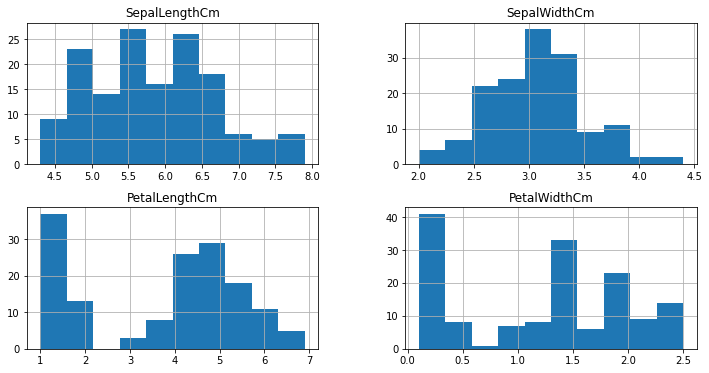

In [71]:
data_set.hist()
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

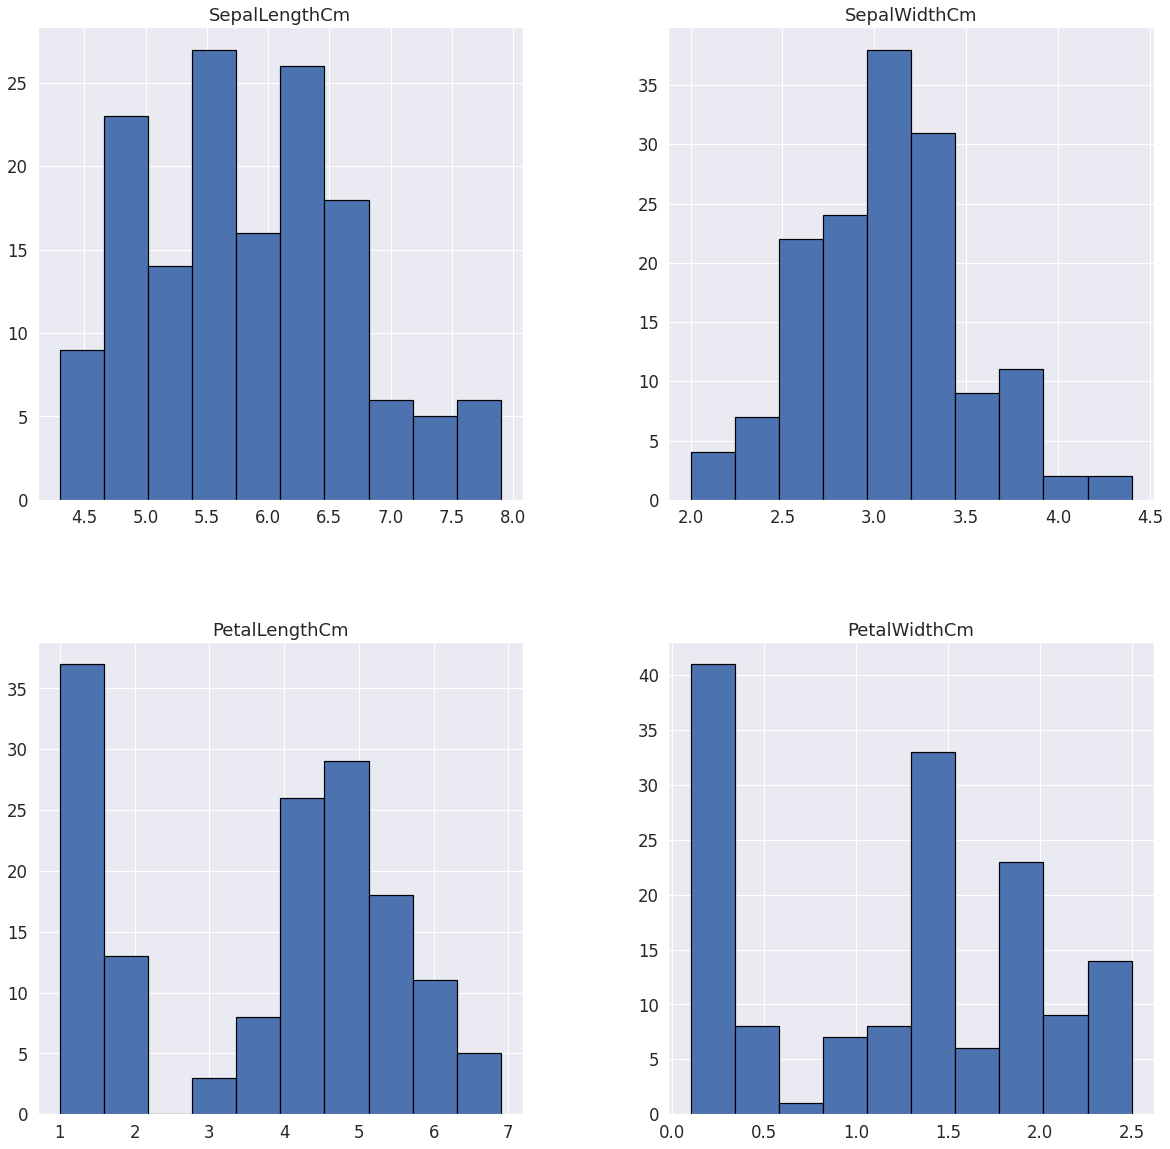

In [72]:
sns.set(font_scale=1.5)
data_set.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

Text(0.5, 1.0, 'Species vs Sepal Length')

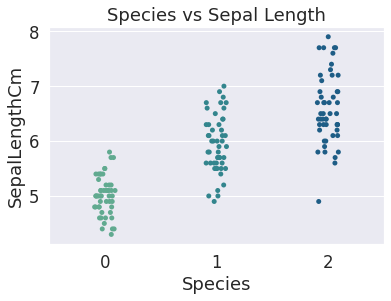

In [73]:
#graph.visualization
sns.stripplot(x='Species', y='SepalLengthCm', data=data, palette='crest')
plt.title('Species vs Sepal Length')

Text(0.5, 1.0, 'Species vs Sepal Width')

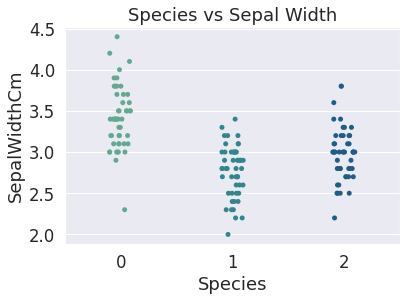

In [74]:
sns.stripplot(x='Species', y='SepalWidthCm', data=data, palette='crest')
plt.title('Species vs Sepal Width')

Text(0.5, 1.0, 'Species vs Petal Length')

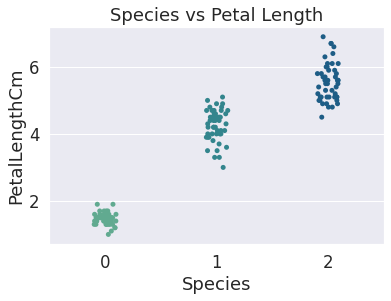

In [75]:
sns.stripplot(x='Species', y='PetalLengthCm', data=data, palette='crest')
plt.title('Species vs Petal Length')

Text(0.5, 1.0, 'Species vs Petal Width')

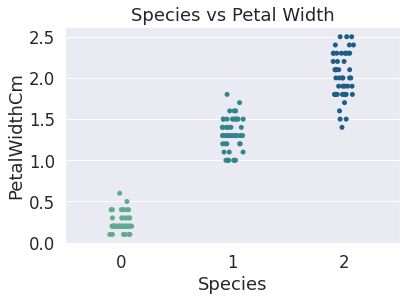

In [76]:
sns.stripplot(x='Species', y='PetalWidthCm', data=data, palette='crest')
plt.title('Species vs Petal Width')

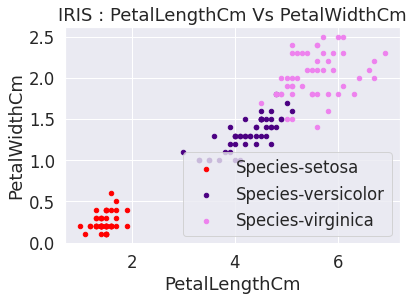

In [77]:
#scatter Plot
plot=data_set[data_set.Species=="Iris-setosa"].plot.scatter(x="PetalLengthCm",y="PetalWidthCm",color='red',label="Species-setosa")
data_set[data_set.Species=="Iris-versicolor"].plot.scatter(x="PetalLengthCm",y="PetalWidthCm",color='indigo',label="Species-versicolor",ax=plot)
data_set[data_set.Species=="Iris-virginica"].plot.scatter(x="PetalLengthCm",y="PetalWidthCm",color='violet',label="Species-virginica",ax=plot)

plt.title("IRIS : PetalLengthCm Vs PetalWidthCm")
plt.show()

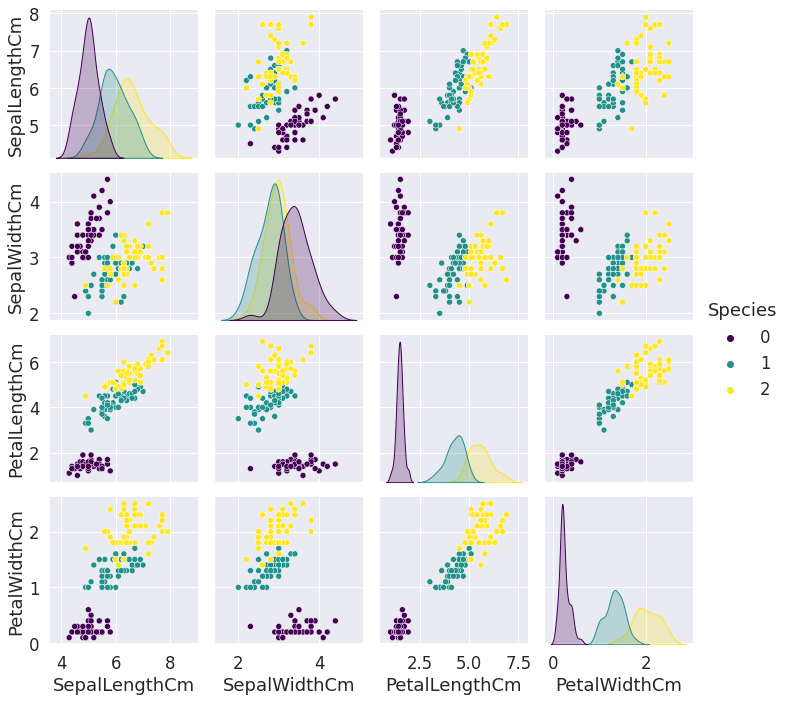

In [78]:
sns.pairplot(data, hue = 'Species',palette='viridis')
plt.show()

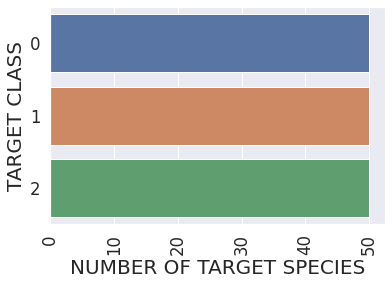

In [79]:
sns.countplot(y=data['Species'],data=data)
plt.xticks(rotation = 90)
plt.ylabel('TARGET CLASS',fontsize=20)
plt.xlabel('NUMBER OF TARGET SPECIES',fontsize=20)
plt.show()

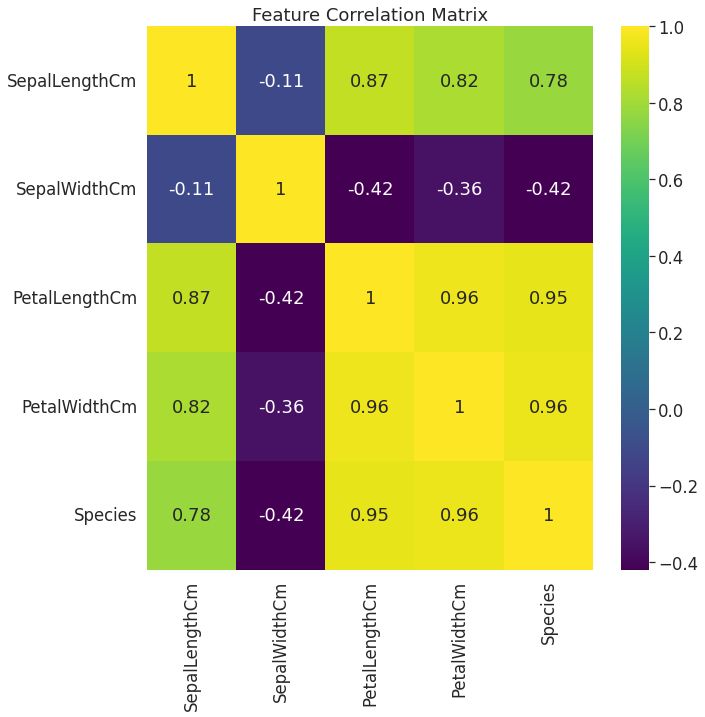

In [80]:
plt.figure(figsize=(10,10))
matrix = data.corr()
corMat = sns.heatmap(matrix, annot=True, cmap="viridis")
corMat.set_title("Feature Correlation Matrix")
plt.show()


Prediction

In [81]:
x=data_set.drop("Species",axis=1)
x[0:10]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [82]:
y=data_set["Species"]
y[0:10]

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
5    Iris-setosa
6    Iris-setosa
7    Iris-setosa
8    Iris-setosa
9    Iris-setosa
Name: Species, dtype: object

In [93]:
x_train.shape
y_train.shape


(105,)

In [94]:
x_test.shape
y_test.shape

(45,)

In [95]:
from sklearn.tree import DecisionTreeClassifier
pred_tree=DecisionTreeClassifier(criterion="entropy",max_depth=5)
pred_tree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [96]:
pred=pred_tree.predict(x_test)

print(pred[0:5])
print(y_test[0:5])

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa']
114     Iris-virginica
62     Iris-versicolor
33         Iris-setosa
107     Iris-virginica
7          Iris-setosa
Name: Species, dtype: object


In [97]:
#Checking accuracy
from sklearn import metrics

print( "Accuracy: ", str(metrics.accuracy_score(y_test, pred)*100)+"%")

Accuracy:  97.77777777777777%


In [100]:
feature_names = data.columns[:4]
target_names = data['Species'].unique().tolist()
arget_names=['0','1','2']
feature_names

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

[Text(133.92000000000002, 195.696, 'X[2] <= 2.35\nentropy = 1.58\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(100.44000000000001, 152.208, 'entropy = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(167.40000000000003, 152.208, 'X[2] <= 4.95\nentropy = 0.993\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(66.96000000000001, 108.72, 'X[3] <= 1.65\nentropy = 0.431\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(33.480000000000004, 65.232, 'entropy = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(100.44000000000001, 65.232, 'X[1] <= 3.1\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(66.96000000000001, 21.744, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(133.92000000000002, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(267.84000000000003, 108.72, 'X[3] <= 1.75\nentropy = 0.179\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(234.36, 65.232, 'X[3] <= 1.65\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(200.88000000000002, 21.744, 'entropy = 0.0\nsamples = 3

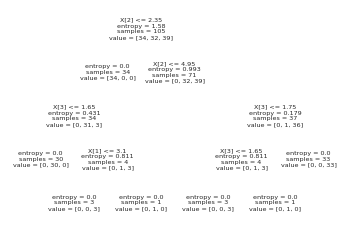

In [101]:
from sklearn import tree
tree.plot_tree(pred_tree)

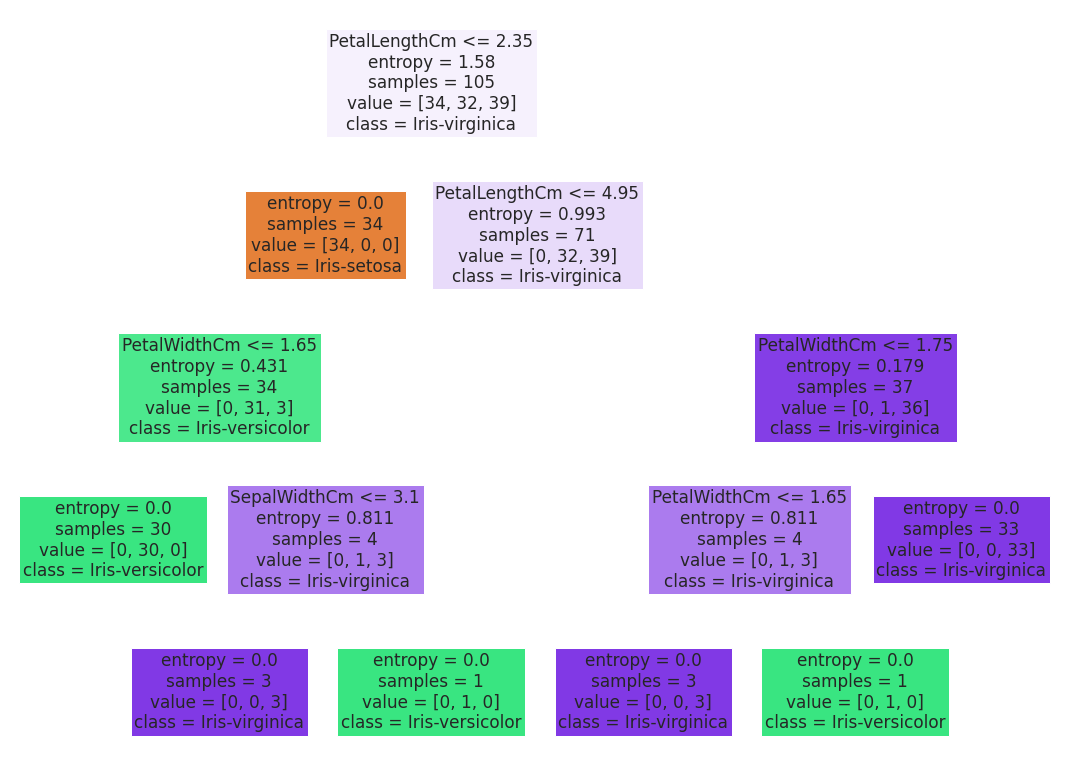

In [106]:
features = data_set.columns[:-1]
classes =data_set['Species'].unique().tolist()

from sklearn.tree import plot_tree
plt.figure(figsize=(19, 14))
plot_tree(pred_tree, feature_names=features, class_names=classes, filled=True)
plt.show()
